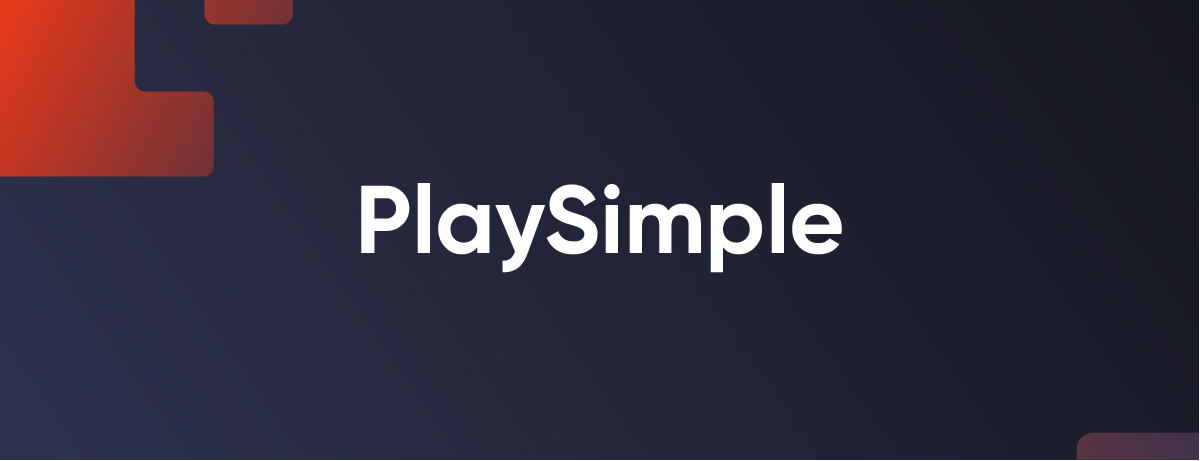

# 🎮 PlaySimple Variant Performance Analysis: Measuring Engagement, Economy & Retention

This notebook presents a comparative analysis of different content variants tested within the game, focusing on three key metric groups:
- 📊 **Engagement** (user actions, puzzle interactions)
- 💰 **Economy** (spend, earn, buy behavior)
- 📈 **Retention** (D1, D7, D14, D21 stickiness)

The goal is to identify which variant performs best across these metrics to guide product decisions.



# 🧪 Problem 1: Variant Testing for Content Optimization

## 🎯 Problem Background
An experiment was conducted on one of our games to test **three different content variants**. Each variant included a unique content set.

The objective was to determine which variant provides the **best balance between**:
- 💰 **Economy**
- 📊 **Engagement**
- 📈 **Retention**

You are provided with relevant data to support this analysis.

---

## ❓ Questions to Answer

1. 🏆 **Which variant is the winner and why?**  
   - Based on combined analysis of economy, engagement, and retention metrics.

2. 🎮 **Rank the variants in the order of their difficulty.**  
   - Use failure rate, hint usage, and puzzle clear rates as supporting indicators.

# 📊 Dataset Overview

We are analyzing **3 datasets** from an experiment run on a game platform. These datasets cover:
- 💰 Economy
- 🎮 Engagement
- 📈 Retention

---

## 🗂️ Common Columns Across All Datasets

| Column         | Description                                              |
|----------------|----------------------------------------------------------|
| `date_field`   | Date of observation (⚠️ inconsistent format)             |
| `variant_group`| Variant ID (1, 2, or 3)                                  |
| `experiment`   | Experiment type (all are `"content"`)                    |
| `version`      | App version                                              |
| `gid`          | Game ID (always `4`)                                     |

> ⚠️ Note: The `date_field` has mixed formats like `MM-DD-YYYY`, `YYYY-MM-DD`, `DD/MM/YYYY`, etc.

---

## 🪙 1. `overall_economy.csv`

| Column         | Description                                  |
|----------------|----------------------------------------------|
| `cash_spent`   | Amount of in-game currency spent             |
| `cash_earned`  | Amount of in-game currency earned            |
| `earntype`     | Type of earning (e.g., `rewarded`, `purchased`) |
| `installs`     | Installs per variant per day                 |

🔍 **Use:** Understand how each variant drives spending and earning behavior.

---

## 🎮 2. `overall_engagement.csv`

| Column         | Description                                  |
|----------------|----------------------------------------------|
| `action_type`  | Type of action (`clear`, `fail`, `view`, `use_hint`) |
| `actions`      | Number of user actions recorded              |
| `installs`     | Installs logged for that group               |

🔍 **Use:** Measure user activity and interaction across variants.

---

## 📈 3. `overall_retention.csv`

| Column         | Description                                  |
|----------------|----------------------------------------------|
| `d1(%)` to `d30(%)` | Retention % on Day 1, 7, 14, 30, etc.     |
| `installs`     | Number of installs per variant per day       |

🔍 **Use:** Evaluate how well each variant retains users over time.

---

## ⚠️ Data Quality Issue

- The `date_field` has **inconsistent formats**, such as:
  - `09-01-2015`
  - `2015-09-01`
  - `01/09/2015`
  - `08/25/2015`

📌 **Impact:** Must be standardized before any date-wise analysis or merging.


In [46]:
# 📦 Importing necessary libraries

# pandas: used for handling and analyzing structured data
import pandas as pd

# numpy: useful for numerical operations
import numpy as np

# matplotlib: basic plotting library for visualizations
import matplotlib.pyplot as plt

# seaborn: statistical data visualization built on top of matplotlib
import seaborn as sns

# (duplicate) pandas already imported above — this can be removed safely
import pandas as pd

# scipy.stats.f_oneway: used for performing one-way ANOVA test
# ANOVA helps us determine if there are statistically significant differences between group means
from scipy.stats import f_oneway


# 2. Data Collection AND OVERVIEW

In [47]:

engagement = pd.read_csv('overall_engagement.csv')
economy = pd.read_csv('overall_economy.csv')
retention = pd.read_csv('overall_retention.csv')

In [48]:
engagement.sample(5)

,action_type,actions,actions_per_dau,actions_per_user,cli,date_field,dau,experiment,gid,users,variant_group,version
128,fail,40233,5.138970,6.883319,0,09/10/2015,7829,content,4,5845,3,2
162,view,58690,9.739462,9.950831,0,09/09/2015,6026,content,4,5898,2,2
207,view,81728,10.480636,10.694583,0,09/03/2015,7798,content,4,7642,3,2
27,clear,62313,10.053727,14.242971,0,09/03/2015,6198,content,4,4375,2,2
79,clear,69848,10.099479,14.512362,0,08/29/2015,6916,content,4,4813,3,2


In [49]:
economy.sample(5)

,cash_per_dau,cash_per_user,cli,date_field,dau,earn_type,experiment,gid,total_cash,users,variant_group,version
173,12.173140,922.115385,0,2015-09-11,7878,purchase,content,4,95900,104,3,2
192,-64.448220,-91.863097,0,2015-09-07,6122,spend,content,4,-394552,4295,2,2
89,64.990816,68.841528,0,2015-08-31,5989,earn,content,4,389230,5654,1,2
198,49.507032,52.492877,0,2015-09-02,7964,earn,content,4,394274,7511,3,2
168,47.837371,50.760345,0,2015-09-09,6026,earn,content,4,288268,5679,2,2


In [50]:
retention.sample(5)

,cli,d1(%),d14(%),d2(%),d21(%),d3(%),d30(%),d4(%),d5(%),d6(%),d7(%),date_field,experiment,gid,installs,variant_group,version
11,0,60,0,39,0,0,0,0,0,0,0,09/15/2015,content,4,418,3,2
46,0,59,0,44,0,38,0,36,28,25,29,09/09/2015,content,4,347,2,2
69,0,50,0,0,0,0,0,0,0,0,0,09/16/2015,content,4,569,1,2
32,0,49,0,0,0,0,0,0,0,0,0,09/16/2015,content,4,749,3,2
20,0,60,0,44,0,35,0,0,0,0,0,09/14/2015,content,4,403,3,2


In [51]:
engagement.describe()

,actions,actions_per_dau,actions_per_user,cli,dau,gid,users,variant_group,version
count,288.000000,288.000000,288.000000,288.0,288.000000,288.0,288.000000,288.000000,288.0
mean,46777.677083,7.333659,9.154993,0.0,6458.347222,4.0,5064.236111,2.000000,2.0
std,23990.564248,3.742869,4.373459,0.0,1076.054001,0.0,1126.383578,0.817918,0.0
min,9713.000000,1.583271,2.322170,0.0,4714.000000,4.0,3401.000000,1.000000,2.0
25%,29547.000000,4.476438,5.983707,0.0,5724.250000,4.0,4155.500000,1.000000,2.0
50%,49717.000000,7.777432,9.654554,0.0,6203.500000,4.0,4811.500000,2.000000,2.0
75%,64240.750000,9.960908,12.168626,0.0,7141.750000,4.0,5807.250000,3.000000,2.0
max,115425.000000,15.349528,18.664156,0.0,8904.000000,4.0,8717.000000,3.000000,2.0


In [52]:
economy.describe()

,cash_per_dau,cash_per_user,cli,dau,gid,total_cash,users,variant_group,version
count,216.000000,216.000000,216.0,216.000000,216.0,216.000000,216.000000,216.000000,216.0
mean,-3.634582,288.299676,0.0,6458.347222,4.0,-23073.421296,3558.944444,2.000000,2.0
std,53.455960,456.236577,0.0,1076.679432,0.0,343455.263923,2650.222363,0.818393,0.0
min,-98.780229,-135.088483,0.0,4714.000000,4.0,-795150.000000,52.000000,1.000000,2.0
25%,-63.396403,-91.508890,0.0,5724.250000,4.0,-399705.000000,82.750000,1.000000,2.0
50%,10.313649,55.575480,0.0,6203.500000,4.0,65250.000000,4324.000000,2.000000,2.0
75%,46.388032,806.785714,0.0,7141.750000,4.0,291132.500000,5587.500000,3.000000,2.0
max,69.542627,1334.426230,0.0,8904.000000,4.0,534967.000000,8358.000000,3.000000,2.0


In [53]:
retention.describe()

,cli,d1(%),d14(%),d2(%),d21(%),d3(%),d30(%),d4(%),d5(%),d6(%),d7(%),gid,installs,variant_group,version
count,72.0,72.000000,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,72.000000,72.000000,72.0,72.000000,72.000000,72.0
mean,0.0,60.347222,8.069444,43.319444,2.375000,33.333333,0.0,28.819444,24.708333,21.791667,19.361111,4.0,539.263889,2.000000,2.0
std,0.0,3.719608,8.883164,9.452366,5.385001,10.532311,0.0,11.306643,11.520267,11.557496,11.539651,0.0,171.223188,0.822226,0.0
min,0.0,49.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.0,281.000000,1.000000,2.0
25%,0.0,59.000000,0.000000,43.000000,0.000000,33.750000,0.0,30.000000,26.000000,23.000000,15.750000,4.0,417.750000,1.000000,2.0
50%,0.0,60.000000,0.000000,45.000000,0.000000,36.000000,0.0,32.500000,29.000000,27.000000,24.000000,4.0,526.500000,2.000000,2.0
75%,0.0,63.000000,17.000000,47.000000,0.000000,38.000000,0.0,34.250000,31.000000,29.000000,27.000000,4.0,623.500000,3.000000,2.0
max,0.0,66.000000,21.000000,52.000000,18.000000,43.000000,0.0,38.000000,38.000000,33.000000,33.000000,4.0,1147.000000,3.000000,2.0


In [55]:
# THIS IS JUST TO UNDERSTAND THE FEATURES , WHETHER CATEGORICAL COLOUMN HAS EXPECTED UNIQUE COLUMNS
print(engagement.describe(include=object))
print(economy.describe(include=object))
print(retention.describe(include=object))

       action_type  date_field experiment
count          288         288        288
unique           4          24          1
top           view  09/16/2015    content
freq            72          12        288
        date_field earn_type experiment
count          216       216        216
unique          24         3          1
top     2015-09-16      earn    content
freq             9        72        216
        date_field experiment
count           72         72
unique          24          1
top     09/04/2015    content
freq             3         72


### 📊 Descriptive Statistics Observation

#### 1. **Engagement Data**
- **Total records**: 288
- **Average user actions per day**: ~46,778
- **Actions per user**: Ranges from **2.32 to 18.66**, with a mean of **9.15**
- **Daily Active Users (DAU)**: Ranges from **4714 to 8904**

---

#### 2. **Economy Data**
- **Total records**: 216
- **Average cash per DAU**: 288.3  



---

#### 3. **Retention Data**
- **Total records**: 72





# IN GIVEN DATA AS ALL THE DATA HAVE CLIENT 0(ANDROID). THERE IS NO NEED TO FILTER THE DATA

#3. Data Preprocessing
Purpose: Clean and prepare the data.

In [56]:
print(engagement.duplicated().sum())
print(economy.duplicated().sum())
print(retention.duplicated().sum())

0
0
0


In [57]:
print(engagement.isnull().sum())
print(economy.isnull().sum())
print(retention.isnull().sum())

action_type         0
actions             0
actions_per_dau     0
actions_per_user    0
cli                 0
date_field          0
dau                 0
experiment          0
gid                 0
users               0
variant_group       0
version             0
dtype: int64
cash_per_dau     0
cash_per_user    0
cli              0
date_field       0
dau              0
earn_type        0
experiment       0
gid              0
total_cash       0
users            0
variant_group    0
version          0
dtype: int64
cli              0
d1(%)            0
d14(%)           0
d2(%)            0
d21(%)           0
d3(%)            0
d30(%)           0
d4(%)            0
d5(%)            0
d6(%)            0
d7(%)            0
date_field       0
experiment       0
gid              0
installs         0
variant_group    0
version          0
dtype: int64


#FIXING INCONSISTENT DATE FORMATS

In [58]:
engagement['date_field'] = pd.to_datetime(engagement['date_field'], errors='coerce')
economy['date_field'] = pd.to_datetime(economy['date_field'], errors='coerce')
retention['date_field'] = pd.to_datetime(retention['date_field'], errors='coerce')


In [59]:
# Save cleaned DataFrames to CSV
engagement.to_csv("cleaned_engagement.csv", index=False)
economy.to_csv("cleaned_economy.csv", index=False)
retention.to_csv("cleaned_retention.csv", index=False)

In [60]:
engagement['date_field'].isna().sum()


np.int64(0)

In [61]:
economy['date_field'].isna().sum()

np.int64(0)

In [62]:
retention['date_field'].isna().sum()

np.int64(0)

In [63]:
engagement['date_field'].head()


,date_field
0,2015-09-16
1,2015-09-16
2,2015-09-05
3,2015-09-05
4,2015-09-13


##OBSERVATION - NO NULL VALUES , NO DUPLICATED VALUES , INCONSISTENT DATE FORMAT FIXED

#4. Exploratory Data Analysis (EDA)
Purpose: Summarize data, perform univariate and bivariate analysis, and visualize

# ECONOMY ANALYSIS



TOTAL CASH AND USERS ARE ABSOLUTE VALUES SO THEY WERE SUMMED,  OTHERS ARE ALREADY AVERAGED VALUES

In [64]:
# THIS IS JUST TO KNOW ABOUT THE USERS AND HOW WELL IT IS BALANCED
user_summary = economy.groupby(['variant_group']).agg({
    'users': 'sum'
})
user_summary

,users
variant_group,
1,223839
2,237540
3,307353


## variant 3 have high users followed by variant 2 and variant 1

In [65]:

economy_summary = economy.groupby(['variant_group', 'earn_type']).agg({
    'cash_per_dau': 'mean',
    'cash_per_user': 'mean',
    'total_cash': 'sum',
}).reset_index()

In [66]:
economy_summary


,variant_group,earn_type,cash_per_dau,cash_per_user,total_cash
0,1,earn,53.021482,56.373945,7143541
1,1,purchase,9.815186,839.182518,1309900
2,1,spend,-74.439845,-105.824369,-9998055
3,2,earn,54.671374,58.106939,7813809
4,2,purchase,10.738993,965.559868,1536100
5,2,spend,-75.107398,-106.738298,-10714654
6,3,earn,50.577701,53.717234,9344945
7,3,purchase,10.641883,937.297622,1967200
8,3,spend,-72.630613,-102.978370,-13386645


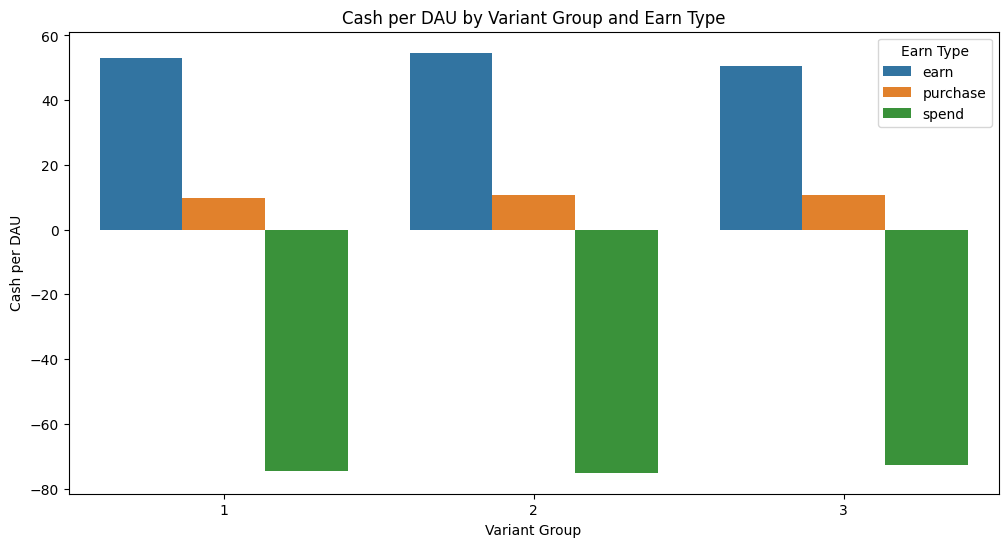

In [67]:
# Let's visualize the average cash flow metrics per DAU and per User for each variant group and earn type.
plt.figure(figsize=(12, 6))
sns.barplot(data=economy_summary, x='variant_group', y='cash_per_dau', hue='earn_type')
plt.title('Cash per DAU by Variant Group and Earn Type')
plt.xlabel('Variant Group')
plt.ylabel('Cash per DAU')
plt.legend(title='Earn Type')
plt.show()



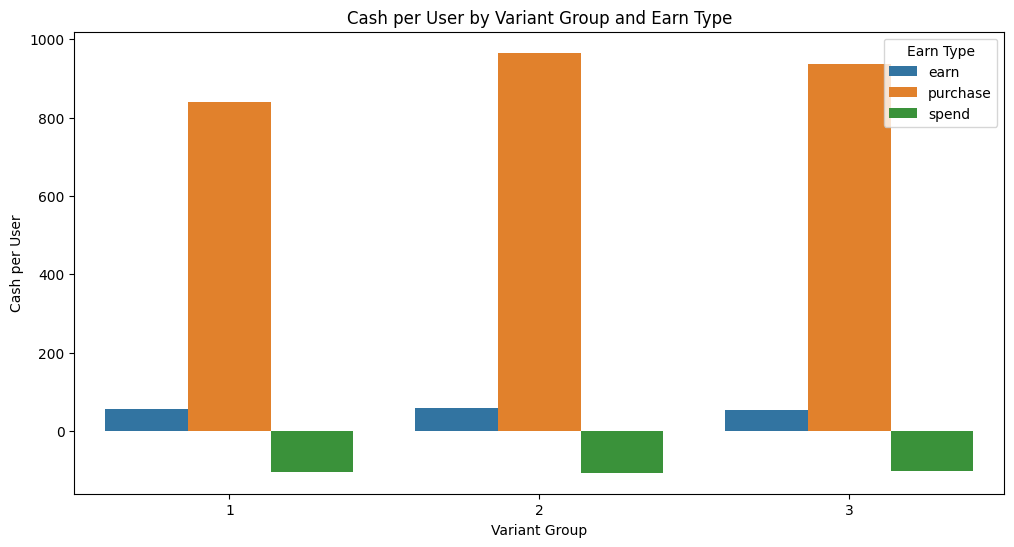

In [68]:
plt.figure(figsize=(12, 6))
sns.barplot(data=economy_summary, x='variant_group', y='cash_per_user', hue='earn_type')
plt.title('Cash per User by Variant Group and Earn Type')
plt.xlabel('Variant Group')
plt.ylabel('Cash per User')
plt.legend(title='Earn Type')
plt.show()

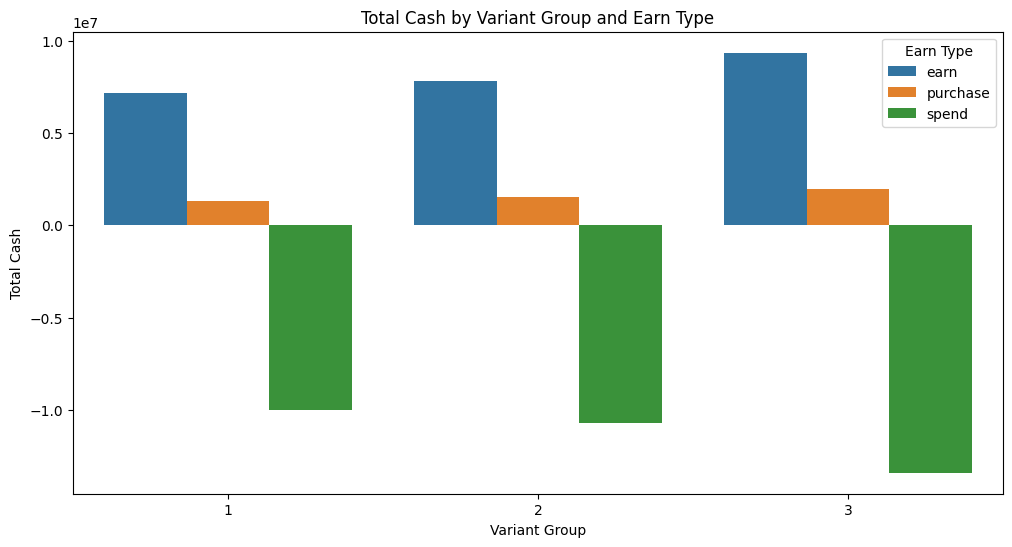

In [69]:


plt.figure(figsize=(12, 6))
sns.barplot(data=economy_summary, x='variant_group', y='total_cash', hue='earn_type')
plt.title('Total Cash by Variant Group and Earn Type')
plt.xlabel('Variant Group')
plt.ylabel('Total Cash')
plt.legend(title='Earn Type')
plt.show()



## 💡 Insight: Why Variant 2 Has Higher Average Cash per DAU & User, But Lower Total Cash

### ✅ What We Observe:
- **Variant 2**:
  - Has **higher efficiency** — its **average cash per DAU** and **cash per user** are the **highest** among all variants.
  - But it has a **lower total cash** compared to Variant 3.

- **Variant 3**:
  - Has **slightly lower averages** (cash/DAU & cash/user) than Variant 2.
  - But it wins in **total cash**, thanks to a **larger user base and higher DAU**.

---

### 📊 Why This Happens:

- **Average Metrics** (cash per DAU or per user):
  - Reflect **how much each user or DAU contributes** on average.
  - Variant 2 is **more efficient per user**.

- **Total Cash**:
  - Reflects **overall revenue**, which depends on both:
    - Number of users / DAUs
    - Their average spending
  - Variant 3 has **more users and DAUs**, so even with slightly lower average spending, it earns **higher total cash**.

---

### 📌 Conclusion:
> **Variant 2 is efficient, but Variant 3 scales better.**  
Variant 2 users are more valuable individually, but Variant 3 benefits from higher scale and reach — making it the top performer in overall monetary impact.


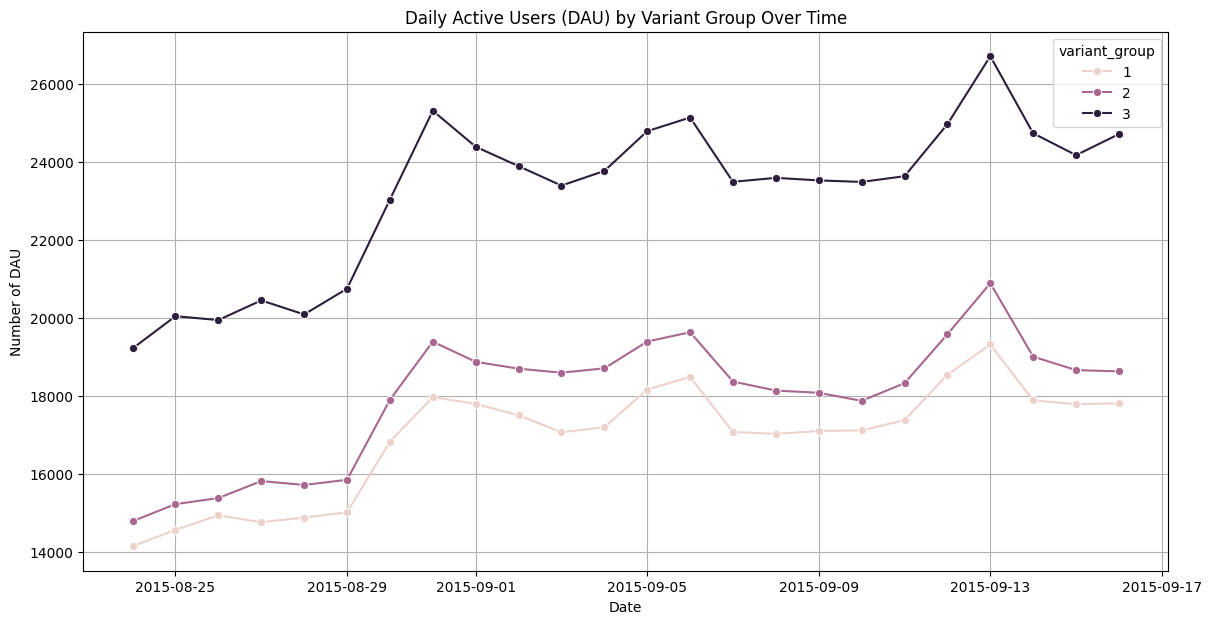

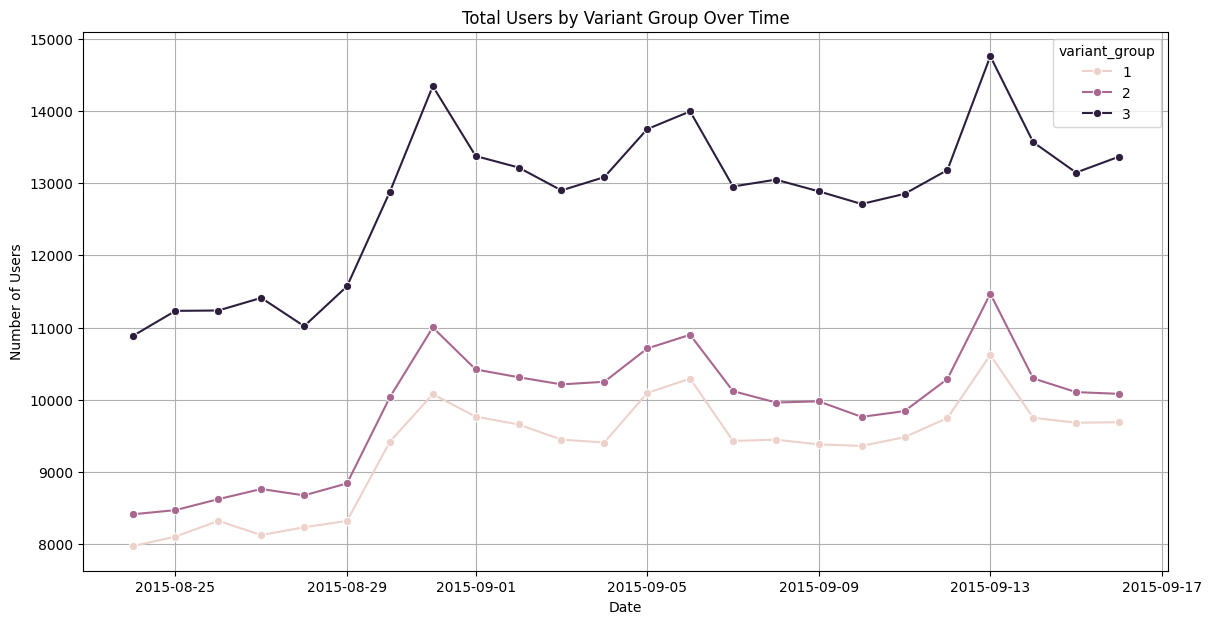

In [70]:


# Group by date_field and variant_group and sum dau and users
daily_summary = economy.groupby(['date_field', 'variant_group']).agg({
    'dau': 'sum',
    'users': 'sum'
}).reset_index()

# Create a line chart for DAU
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_summary, x='date_field', y='dau', hue='variant_group', marker='o')
plt.title('Daily Active Users (DAU) by Variant Group Over Time')
plt.xlabel('Date')
plt.ylabel('Number of DAU')
plt.grid(True)
plt.show()

# Create a line chart for Users
plt.figure(figsize=(14, 7))
sns.lineplot(data=daily_summary, x='date_field', y='users', hue='variant_group', marker='o')
plt.title('Total Users by Variant Group Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

observation
# Daily Active Users (DAU) by Variant Group Over Time
Variant 3 has the highest and most consistent DAU over time.This may due to high users in variant 3

All variants see a spike around end of August and mid-September


# ENGAGEMENT ANALYSIS

In [81]:
engagement.head(2)

,action_type,actions,actions_per_dau,actions_per_user,cli,date_field,dau,experiment,gid,users,variant_group,version
0,view,74708,9.068706,9.351358,0,2015-09-16,8238,content,4,7989,3,2
1,use_hint,13831,1.678927,2.504255,0,2015-09-16,8238,content,4,5523,3,2


In [86]:
# THIS IS JUST TO KNOW ABOUT THE USERS AND HOW WELL IT IS BALANCED
user_engagement = engagement.groupby(['variant_group']).agg({
    'users': 'sum'
})
user_engagement

,users
variant_group,
1,425595
2,451000
3,581905


In [103]:
#This is just to know the total actions of each variant but we cant come to conclusion with this as different variant have different number of users
total_actions = engagement.groupby(['variant_group']).agg({
    'actions': 'sum'
})
total_actions

,actions
variant_group,
1,3997485
2,4345962
3,5128524


In [92]:
#average actions per dau
engage_dautotal=engagement.pivot_table(index=['variant_group'],values='actions_per_dau',aggfunc='mean')
engage_dautotal

,actions_per_dau
variant_group,
1,7.431367
2,7.615511
3,6.954098


In [93]:
#Average actions per user
engage_usertotal=engagement.pivot_table(index=['variant_group'],values='actions_per_user',aggfunc='mean')
engage_usertotal


,actions_per_user
variant_group,
1,9.258924
2,9.499905
3,8.706149


In [94]:

engage_pivot=engagement.pivot_table(index=['action_type','variant_group'],values='actions_per_dau',aggfunc='mean')

In [95]:
engage_pivot

actions_per_dau
action_type variant_group                 
clear       1                     9.643936
            2                     9.938563
            3                     8.972568
fail        1                     6.916150
            2                     7.005295
            3                     6.455244
use_hint    1                     1.975306
            2                     1.967010
            3                     1.896488
view        1                    11.190077
            2                    11.551178
            3                    10.492091

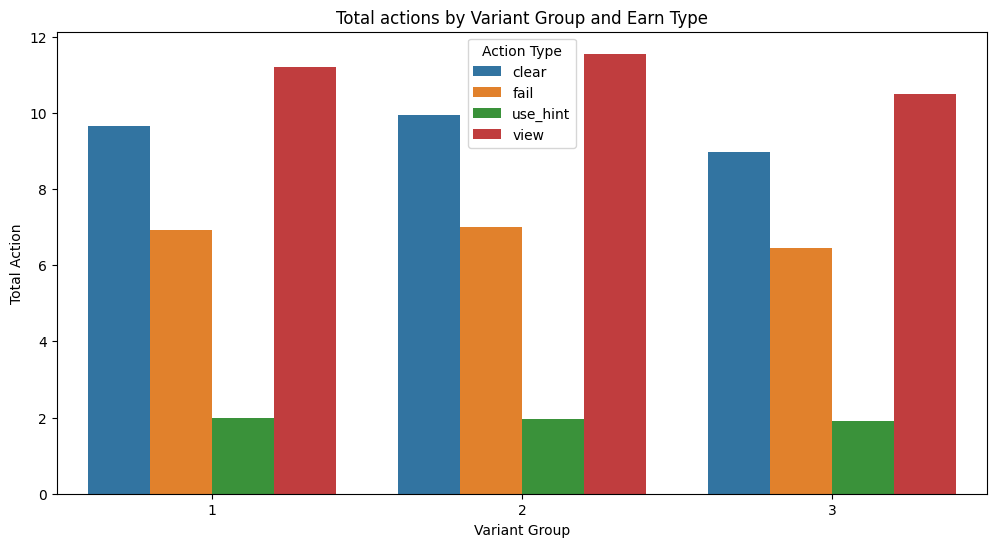

In [97]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=engage_pivot, x='variant_group', y='actions_per_dau', hue='action_type')

plt.title('Total actions by Variant Group and Earn Type')
plt.xlabel('Variant Group')
plt.ylabel('Total Action')
plt.legend(title='Action Type')

# Annotate exact values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='white', padding=3)

plt.show()


In [104]:
engage_pivot1=engagement.pivot_table(index=['action_type','variant_group'],values='actions_per_user',aggfunc='mean')
engage_pivot1

actions_per_user
action_type variant_group                  
clear       1                     13.883683
            2                     14.387705
            3                     13.109687
fail        1                      8.878614
            2                      8.982854
            3                      8.285982
use_hint    1                      2.820797
            2                      2.812523
            3                      2.704978
view        1                     11.452602
            2                     11.816537
            3                     10.723950

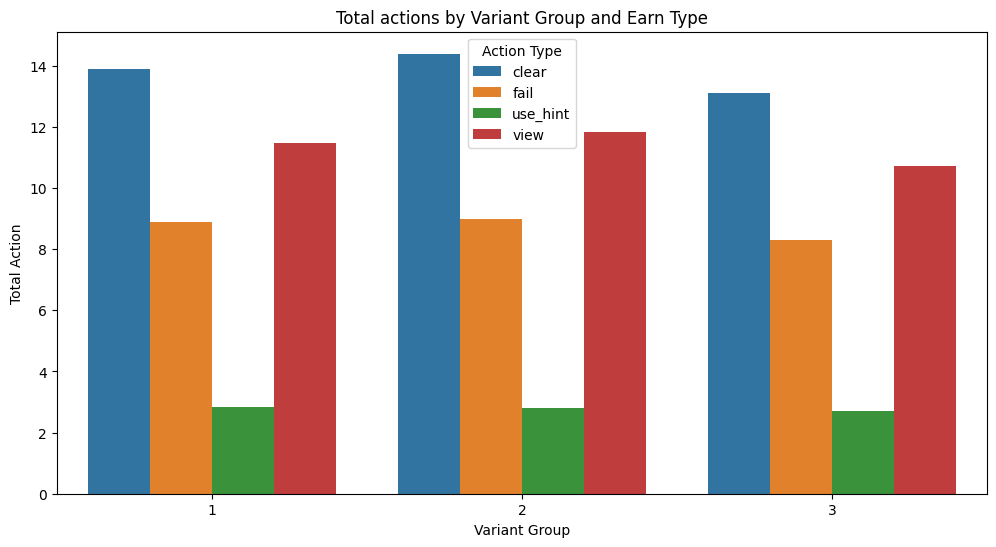

In [100]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=engage_pivot, x='variant_group', y='actions_per_user', hue='action_type')

plt.title('Total actions by Variant Group and Earn Type')
plt.xlabel('Variant Group')
plt.ylabel('Total Action')
plt.legend(title='Action Type')

# Annotate exact values on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', fontsize=10, color='white', padding=3)

plt.show()

# 📊 Engagement Insights Across Variants

## 🧍‍♂️ Users per Variant
- **Variant 3** has the highest number of users: **581,905**
- Variant 2: 451,000  
- Variant 1: 425,595

🔍 **Interpretation**: Variant 3 attracted the most users, suggesting broader appeal or better onboarding.

---

## 🔄 Overall Engagement Rates

| Metric           | Variant 1 | Variant 2 | Variant 3 |
|------------------|-----------|-----------|-----------|
| **Actions/DAU**  | 7.43      | 🔼 **7.62** | 6.95      |
| **Actions/User** | 9.26      | 🔼 **9.50** | 8.71      |

✅ **Variant 2** leads in both per-user and per-DAU activity.

---

## 🎮 Engagement by Action Type

### ✅ Clear Rate (Puzzle Solves)

| Metric   | V1     | V2      | V3     |
|----------|--------|---------|--------|
| per DAU  | 9.64   | 🔼 9.94  | 8.97   |
| per User | 13.88  | 🔼 14.39 | 13.11  |

Variant 2 shows the highest success rate in puzzle clearing, indicating smoother or more engaging content.

---

### ❌ Fail Rate

| Metric   | V1    | V2     | V3    |
|----------|-------|--------|-------|
| per DAU  | 6.92  | 🔼 7.01 | 6.46  |
| per User | 8.88  | 🔼 8.98 | 8.29  |

⚠️ Variant 2 also shows slightly higher failure, which could indicate moderately increased challenge (but not excessive).

---

### 💡 Hint Usage (Coins Spent)

| Metric   | V1    | V2    | V3     |
|----------|-------|-------|--------|
| per DAU  | 1.98  | 1.97  | 🔽 1.90 |
| per User | 2.82  | 2.81  | 🔽 2.70 |

✅ Hint usage is lowest in Variant 3, suggesting puzzles may be easier or more intuitive — possibly less monetizable.

---

### 👀 Views (Puzzle Opened)

| Metric   | V1     | V2      | V3     |
|----------|--------|---------|--------|
| per DAU  | 11.19  | 🔼 11.55 | 10.49  |
| per User | 11.45  | 🔼 11.82 | 10.72  |

✅ Again, Variant 2 leads in views, indicating high user interaction and stickiness.

# RETENTION ANALYSIS

In [105]:
retention.sample(5)

,cli,d1(%),d14(%),d2(%),d21(%),d3(%),d30(%),d4(%),d5(%),d6(%),d7(%),date_field,experiment,gid,installs,variant_group,version
59,0,60,0,47,0,40,0,38,38,31,33,2015-09-06,content,4,475,2,2
31,0,59,15,44,13,34,0,32,29,29,22,2015-08-26,content,4,536,2,2
54,0,64,17,48,16,39,0,32,26,26,28,2015-08-24,content,4,742,3,2
66,0,61,0,44,0,34,0,35,27,24,0,2015-09-11,content,4,318,2,2
9,0,64,19,49,0,43,0,38,32,29,25,2015-09-02,content,4,539,2,2


In [106]:
retention=retention[sorted(retention.columns)]

In [107]:
retention

,cli,d1(%),d14(%),d2(%),d21(%),d3(%),d30(%),d4(%),d5(%),d6(%),d7(%),date_field,experiment,gid,installs,variant_group,version
0,0,60,0,45,0,32,0,30,27,24,24,2015-09-04,content,4,399,1,2
1,0,59,17,45,0,32,0,33,28,23,23,2015-09-01,content,4,767,3,2
2,0,66,18,50,18,40,0,34,34,30,27,2015-08-25,content,4,578,2,2
3,0,59,18,45,0,35,0,31,30,28,26,2015-08-31,content,4,1147,3,2
4,0,61,0,48,0,36,0,33,27,27,21,2015-09-09,content,4,418,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,61,21,50,0,39,0,37,31,30,28,2015-09-03,content,4,452,2,2
68,0,56,0,42,0,33,0,30,29,23,0,2015-09-11,content,4,452,3,2
69,0,50,0,0,0,0,0,0,0,0,0,2015-09-16,content,4,569,1,2
70,0,66,0,44,0,33,0,31,25,0,0,2015-09-12,content,4,529,2,2


In [108]:
retention = retention.sort_values(by='date_field')


In [109]:
retention

,cli,d1(%),d14(%),d2(%),d21(%),d3(%),d30(%),d4(%),d5(%),d6(%),d7(%),date_field,experiment,gid,installs,variant_group,version
56,0,64,17,45,14,37,0,33,29,29,27,2015-08-24,content,4,622,1,2
53,0,63,19,47,15,41,0,34,31,30,28,2015-08-24,content,4,603,2,2
54,0,64,17,48,16,39,0,32,26,26,28,2015-08-24,content,4,742,3,2
6,0,61,16,45,13,34,0,29,29,25,24,2015-08-25,content,4,561,1,2
33,0,59,18,45,15,37,0,31,29,29,26,2015-08-25,content,4,763,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34,0,63,0,45,0,0,0,0,0,0,0,2015-09-15,content,4,362,1,2
11,0,60,0,39,0,0,0,0,0,0,0,2015-09-15,content,4,418,3,2
32,0,49,0,0,0,0,0,0,0,0,0,2015-09-16,content,4,749,3,2
69,0,50,0,0,0,0,0,0,0,0,0,2015-09-16,content,4,569,1,2


In [110]:
pivot_retention = retention.pivot_table(index=['variant_group'],values='installs')

In [111]:
pivot_retention

,installs
variant_group,
1,488.541667
2,487.333333
3,641.916667


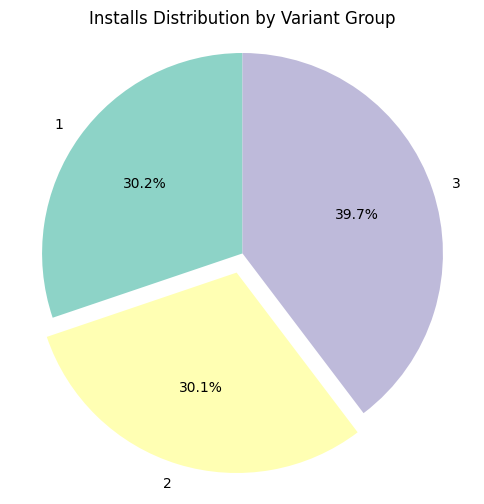

In [115]:
plt.figure(figsize=(6, 6))
plt.pie(
    pivot_retention['installs'],                         # values
    labels=pivot_retention.index.astype(str),            # labels (converted to string inline)
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Set3.colors,
    explode = [0, 0.1, 0]
)
plt.title('Installs Distribution by Variant Group')
plt.axis('equal')
plt.show()

In [116]:
retention_pivot1=retention.pivot_table(index='variant_group',values=['d1(%)','d7(%)','d14(%)','d21(%)'],aggfunc='mean')

In [117]:
retention_pivot1

,d1(%),d14(%),d21(%),d7(%)
variant_group,,,,
1,59.541667,7.666667,2.208333,19.125000
2,61.458333,8.541667,2.458333,19.916667
3,60.041667,8.000000,2.458333,19.041667


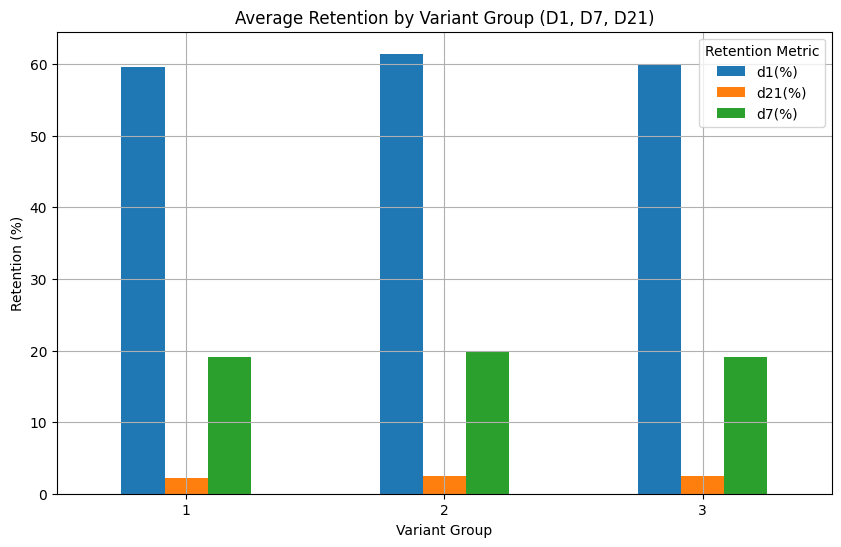

In [41]:
# Plot retention metrics
retention_pivot1.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.title('Average Retention by Variant Group (D1, D7, D21)')
plt.xlabel('Variant Group')
plt.ylabel('Retention (%)')
plt.xticks(rotation=0)
plt.grid(True)
plt.legend(title='Retention Metric')

# Show plot
plt.show()


# 📈 Retention Insights Across Variants

---

## 👥 Installs per Variant

- **Variant 3** has the highest installs: **641.92**
- Variant 1: 488.54  
- Variant 2: 487.33  

🔍 **Interpretation**: Variant 3 attracted the most installs, suggesting higher initial interest or effective acquisition.

---

## ⏳ Retention Performance by Day

| Retention Day | Variant 1 | Variant 2 | Variant 3 |
|---------------|-----------|-----------|-----------|
| **D1 (%)**    | 59.54     | 🔼 **61.46** | 60.04     |
| **D7 (%)**    | 19.13     | 🔼 **19.92** | 19.04     |
| **D14 (%)**   | 7.67      | 🔼 **8.54**  | 8.00      |
| **D21 (%)**   | 2.21      | 🔼 **2.46**  | 🔼 **2.46** |

✅ **Variant 2** leads on every retention milestone — indicating stronger long-term engagement and stickiness.

# ✅ Final Recommendation Summary – Problem 1

## 1️⃣ Which Variant is Our Winner and Why?

After analyzing the experiment across **economy**, **engagement**, and **retention**, our recommended winning variant is:

> 🎯 **Variant 2** — It provides the best balance of efficiency, user interaction, and long-term retention.

### 💰 Economy:
- **Variant 2** shows the **highest cash per DAU and per user**, indicating strong monetization potential on a per-user basis.
- While **Variant 3** brings in more **total cash**, this is mainly due to its **larger user base** — not efficiency.
- **Conclusion**: **Variant 2 is more efficient**, but **Variant 3 scales better**.

### 🎮 Engagement:
- **Variant 2** outperforms in **clear rates, views, and actions per user**, making it the most engaging experience.
- **Variant 3** leads in total users but shows **lower per-user engagement**.
- **Conclusion**: Variant 2 keeps users more active and engaged.

### 📈 Retention:
- **Variant 2** leads in **D1, D7, D14, and D21 retention**, showing that users are more likely to return and stay engaged over time.
- **Conclusion**: Variant 2 ensures longer-lasting player loyalty.

---

## 2️⃣ Ranking Variants by Difficulty (based on fail rate and hint usage)

| Difficulty Rank | Variant     | Reason                                                      |
|-----------------|-------------|-------------------------------------------------------------|
| 1 (Most Difficult) | **Variant 2** | Highest fail rate and hint usage per user/DAU             |
| 2 (Moderate)       | **Variant 1** | Balanced across fail and hint metrics                     |
| 3 (Easiest)        | **Variant 3** | Lowest fail and hint use — puzzles likely easier          |

---

## 🏁 Final Verdict:

- **Choose Variant 2** if your goal is to **maximize engagement and long-term retention** — perfect for sustained revenue and loyal users.
- **Consider Variant 3** for **wide-scale adoption and monetization through reach**, especially when aiming for growth via user volume.


In [118]:
import pandas as pd
from scipy.stats import f_oneway

# Load data
economy = pd.read_csv("overall_economy.csv")
engagement = pd.read_csv("overall_engagement.csv")
retention = pd.read_csv("overall_retention.csv")

# Extract raw data for economy metrics by variant
earn_data = [economy[(economy['earn_type'] == 'earn') & (economy['variant_group'] == v)]['cash_per_dau'].values for v in [1, 2, 3]]
spend_data = [economy[(economy['earn_type'] == 'spend') & (economy['variant_group'] == v)]['cash_per_dau'].values for v in [1, 2, 3]]

# Extract raw data for engagement metrics by variant
actions_data = [engagement[engagement['variant_group'] == v]['actions_per_dau'].values for v in [1, 2, 3]]
fail_data = [engagement[engagement['action_type'] == 'fail'][(engagement['variant_group'] == v)]['actions_per_dau'].values for v in [1, 2, 3]]

# Extract raw data for retention metrics by variant
d1_data = [retention[retention['variant_group'] == v]['d1(%)'].values for v in [1, 2, 3]]

# Perform ANOVA
print("ANOVA Results:")
print(f"Earnings per DAU: p-value = {f_oneway(*earn_data)[1]:.4f}")
print(f"Spending per DAU: p-value = {f_oneway(*spend_data)[1]:.4f}")
print(f"Actions per DAU: p-value = {f_oneway(*actions_data)[1]:.4f}")
print(f"Fail Rate per DAU: p-value = {f_oneway(*fail_data)[1]:.4f}")
print(f"D1 Retention: p-value = {f_oneway(*d1_data)[1]:.4f}")

# Calculate composite score for best variant (using means since raw data is used for ANOVA)
earn_means = [economy[(economy['earn_type'] == 'earn') & (economy['variant_group'] == v)]['cash_per_dau'].mean() for v in [1, 2, 3]]
spend_means = [economy[(economy['earn_type'] == 'spend') & (economy['variant_group'] == v)]['cash_per_dau'].mean() for v in [1, 2, 3]]
actions_means = [engagement[engagement['variant_group'] == v]['actions_per_dau'].mean() for v in [1, 2, 3]]
d1_means = [retention[retention['variant_group'] == v]['d1(%)'].mean() for v in [1, 2, 3]]

composite_scores = [earn_means[i] - abs(spend_means[i]) + actions_means[i] + d1_means[i] for i in range(3)]
best_variant = [1, 2, 3][composite_scores.index(max(composite_scores))]

# Rank by difficulty (using mean fail rates)
fail_means = [engagement[engagement['action_type'] == 'fail'][(engagement['variant_group'] == v)]['actions_per_dau'].mean() for v in [1, 2, 3]]
difficulty_rank = sorted([1, 2, 3], key=lambda x: fail_means[x-1], reverse=True)

# Output results
print(f"\nBest Variant: {best_variant}")
print(f"Difficulty Rank: {difficulty_rank}")

ANOVA Results:
Earnings per DAU: p-value = 0.1255
Spending per DAU: p-value = 0.7670
Actions per DAU: p-value = 0.4515
Fail Rate per DAU: p-value = 0.1539
D1 Retention: p-value = 0.1812

Best Variant: 2
Difficulty Rank: [2, 1, 3]


/tmp/ipython-input-2741551197.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fail_data = [engagement[engagement['action_type'] == 'fail'][(engagement['variant_group'] == v)]['actions_per_dau'].values for v in [1, 2, 3]]
/tmp/ipython-input-2741551197.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fail_data = [engagement[engagement['action_type'] == 'fail'][(engagement['variant_group'] == v)]['actions_per_dau'].values for v in [1, 2, 3]]
/tmp/ipython-input-2741551197.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fail_data = [engagement[engagement['action_type'] == 'fail'][(engagement['variant_group'] == v)]['actions_per_dau'].values for v in [1, 2, 3]]
/tmp/ipython-input-2741551197.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fail_means = [engagement[engagement['action_type'] == 'fail'][(engagement['variant_group'] == v)]['actions_per_

### **Problem 2**

#### Background:
Our gaming studio is looking to fast follow one of the following two games:  
1. **Words with Friends**  
2. **Candy Crush**

---

#### Question(s) to be answered:
**Which one according to you is a better investment and why?**  
You are free to research and use any publicly available metrics for both of these games and make any other reasonable assumptions.  
Please **mention the values used and assumptions made very clearly.**

---

#### Retention Data (Reference)

| Metric Group | Metric     | Words with Friends | Candy Crush |
|--------------|------------|--------------------|-------------|
| Retention    | D1 (%)     | 60                 | 55          |
| Retention    | D30 (%)    | 25                 | 15          |


# SOME RESEARCH ABOUT WORD WITH FRIENDS AND CANDY CRUSH

## 🌎 Market & Gameplay Comparison

| Feature               | Words With Friends                   | Candy Crush                          |
|-----------------------|--------------------------------------|--------------------------------------|
| **Genre**             | Multiplayer Word Game (PvP)          | Single-player Match-3 Puzzle         |
| **Monetization**      | Ads + Coins for Powerups             | IAP-heavy: lives, boosters, retries  |
| **Replayability**     | Infinite due to real-time opponents  | Finite levels, burnout risk          |
| **Social Stickiness** | High (chat, leaderboards, PvP)       | Medium (events, but less social)     |
| **Skill vs. Luck**    | Skill-based gameplay                 | Luck-based + pay-to-progress         |

## 💰 Revenue & Popularity (from public sources)

| Metric (approximate)    | Words With Friends | Candy Crush |
|-------------------------|--------------------|-------------|
| MAU (Monthly Active)    | ~4–5 million       | ~200 million |
| Lifetime Revenue        | ~$500M+            | $10B+       |
| Peak Rank (iOS/Android) | Top 200–300        | Top 10–20   |

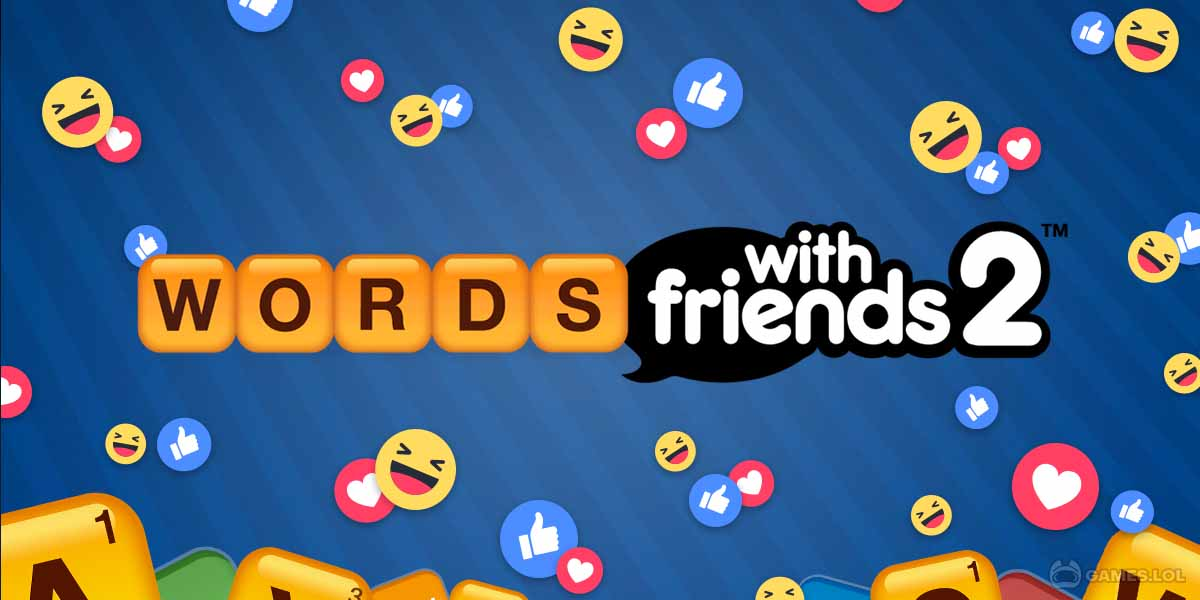

# ✅ Final Conclusion: What Should a Company Focus On — Retention or Revenue?

When a company decides to invest in or build a game, **both retention and revenue are important**, but they matter at **different stages**:

---

### 🎮 Early-Stage Games: Focus on Retention
- **Retention** (especially Day 1 and Day 30) tells us if players like the game and keep coming back.
- If a game can't retain users, it won’t generate revenue in the long run.
- So, **good retention = a strong product foundation**.

---

### 💰 Mature or Scaling Games: Focus on Revenue
- Once a game proves it can keep users, the focus shifts to **how much money it can make**.
- This includes **in-app purchases, ads, and long-term monetization**.

---

### 🧠 In a Fast-Follow Strategy (like this case):
- The goal isn’t to copy a top-grossing game directly.
- Instead, pick a game with **proven user stickiness (good retention)** and then **improve or innovate**.
- ✅ **Retention comes first**, and **monetization can be added later**.

---

## 🏁 Final Verdict

> 🎯 **Words With Friends is a better investment** — it shows stronger Day 1 and Day 30 retention, has a skill-based and socially viral gameplay model, and offers long-term growth potential with room to innovate.
